In [1]:
print("hello world")

hello world


In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (7,7)})

In [3]:
def my_decompose(values, period, model='additive'):
    'multiplicative'
    result = seasonal_decompose(
        values, model=model, extrapolate_trend='freq', period=eval(period))

    result.plot().suptitle(f'{model} Decompose {period}', fontsize=22)

    return result


def plot_seasonal(seasonal, period):
    fig, axs = plt.subplots(1, 2, figsize=(16,7))
    sections = np.split(seasonal, range(period, len(seasonal) - len(seasonal)%period, period))
    if len(sections[-1]) != period:
        del sections[-1]
    mean = np.mean(sections, axis=0)

    for section in sections:
        axs[0].plot(section)

    # plt.plot(mean)
    # plt.show()
    print(mean - seasonal[:period])
    # plt.plot(mean - decomposed.seasonal[:period])
    # plt.show()

    axs[1].plot(seasonal)
    plt.show()


def apply(period, values):#, decomposed): #, kind, model='additive'):
    decomposed = my_decompose(values, period)
    plt.show()

    plot_seasonal(np.array(decomposed.seasonal), eval(period))
    plot_seasonal(np.array(decomposed.trend), eval(period))
    plot_seasonal(np.array(decomposed.resid), eval(period))

    # if kind == "seasonal":
        # if model == "multiplicative":
            # values = values / decomposed.seasonal
        # elif model == 'additive':
    values = values - decomposed.seasonal
    # plt.plot(decomposed.seasonal[:eval(period)*3])
    # plt.show()
    # elif kind == "trend":
    values = values - decomposed.trend
    # plt.plot(decomposed.trend)
    # plt.show()

    return values, decomposed


def replace_with_linear_interpolation(indices):
    train['rownum'] = np.arange(train.shape[0])
    invalid = train.drop(indices)
    f = interp1d(invalid['rownum'], invalid['total'], fill_value="extrapolate")
    train['total'] = f(train['rownum'])
    del train['rownum']

In [4]:
train = pd.read_csv("train.csv")
train

,datetime,total
0,01.01.2005 00:00:00,?
1,01.01.2005 01:00:00,154140
2,01.01.2005 02:00:00,157818
3,01.01.2005 03:00:00,149311
4,01.01.2005 04:00:00,138282
...,...,...
35059,31.12.2008 19:00:00,249376
35060,31.12.2008 20:00:00,246511
35061,31.12.2008 21:00:00,226469
35062,31.12.2008 22:00:00,199907


In [5]:
train['total'].replace("?", -1000, inplace=True)
train['total'] = train['total'].astype(np.int32)

train[train['total'] <= 0]

,datetime,total
0,01.01.2005 00:00:00,-1000
3936,14.06.2005 00:00:00,-1000
3944,14.06.2005 08:00:00,-1000
3970,15.06.2005 10:00:00,-1000
3973,15.06.2005 13:00:00,-1000
...,...,...
34329,01.12.2008 09:00:00,-1000
34464,07.12.2008 00:00:00,-1000
34475,07.12.2008 11:00:00,-1000
34477,07.12.2008 13:00:00,-1000


In [6]:
time_format = "%d.%m.%Y %H:%M:%S"
train["datetime"] = [dt.datetime.strptime(s, time_format) for s in train["datetime"]]
train.sort_values(by=["datetime"], inplace=True)

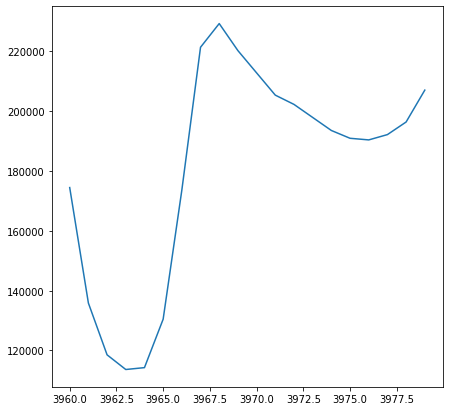

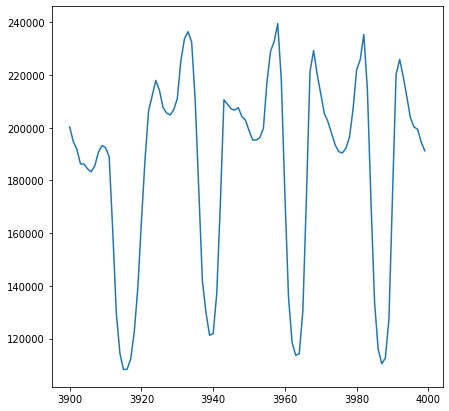

In [7]:
# replace non-positive values with linear interpolation
replace_with_linear_interpolation(train.loc[train['total'] <= 0].index)

plt.plot(train[3960:3980]["total"])
plt.show()
plt.plot(train[3900:4000]["total"])
plt.show()

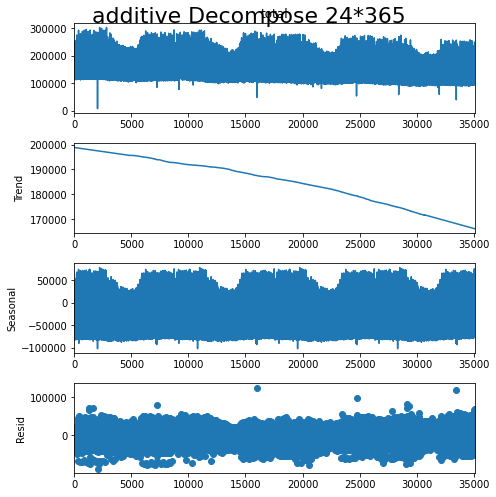

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -7.27595761e-12
  0.00000000e+00  0.00000000e+00]


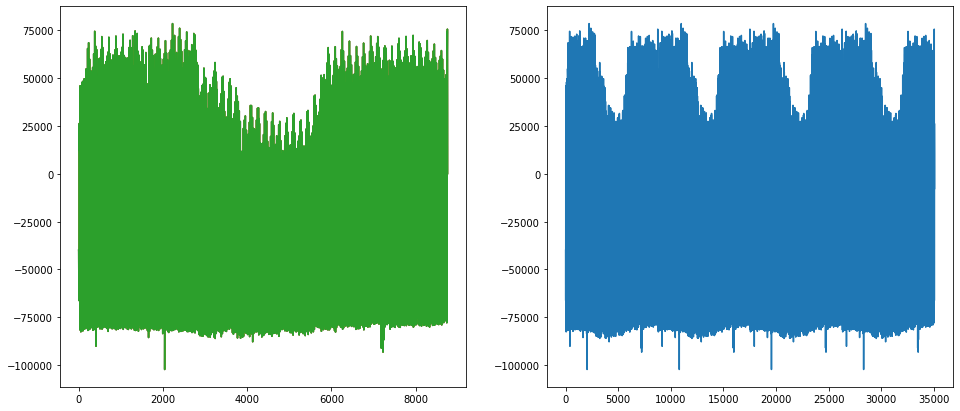

[-6162.45786499 -6162.87260543 -6163.15738011 ... -7285.7814688
 -7284.82929033 -7284.50351979]


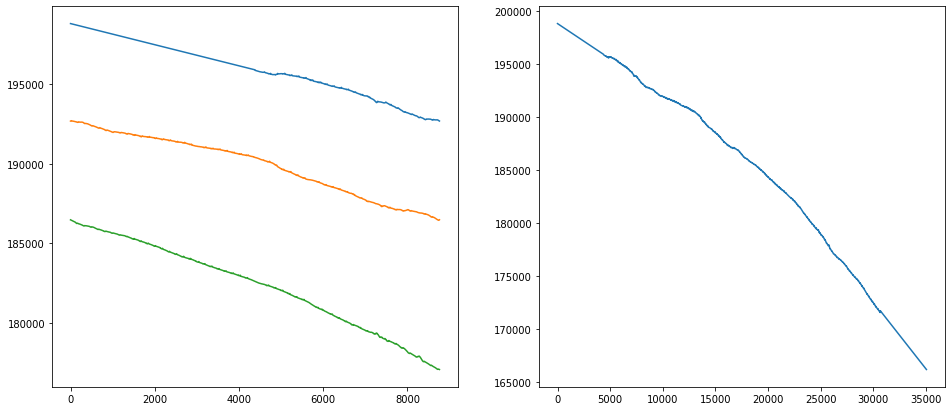

[-3571.20880168  1121.53927209  -731.17595322 ... -4310.88519787
 -1053.17070967  1065.17018645]


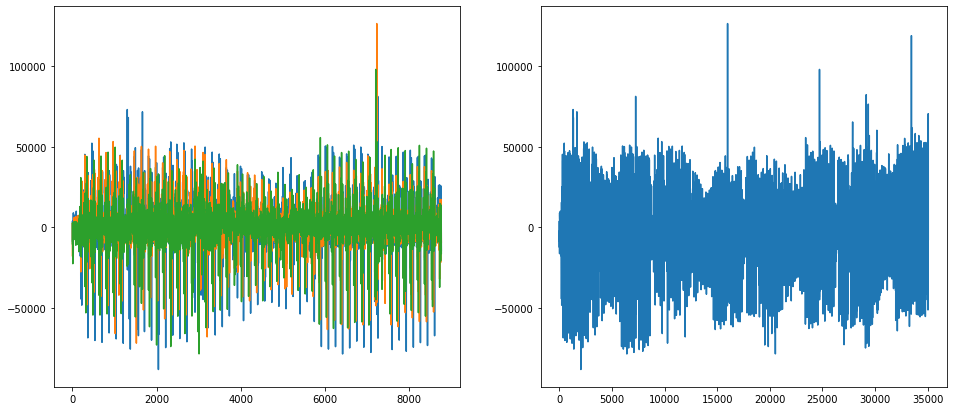

In [8]:
year_values, year_decomposed = apply("24*365", train["total"])

In [9]:
global_trend = year_decomposed.trend
train['total'] -= global_trend

In [10]:
# replace outlier values with linear interpolation
print(len(train[train['total'] < -100_000]) / len(train))

replace_with_linear_interpolation(train.loc[train['total'] < -100_000].index)

0.0002851927903262606


In [11]:
train['total'].describe()

count     35064.000000
mean        182.310707
std       44510.593192
min      -98843.734361
25%      -27666.754693
50%       11630.643215
75%       32287.640240
max      105232.374088
Name: total, dtype: float64

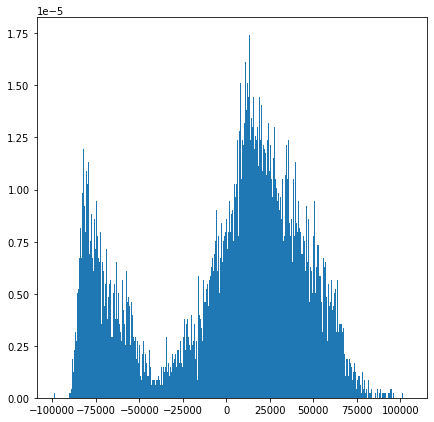

In [12]:
plt.hist(train["total"], 1500, density=True)
plt.show()

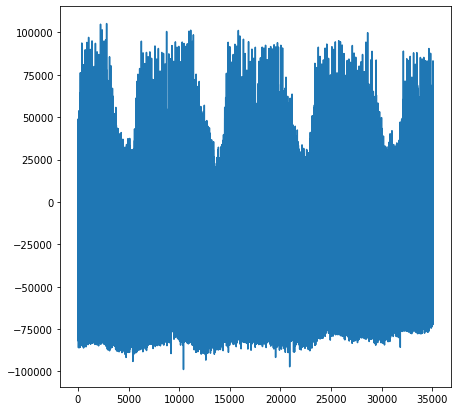

In [13]:
plt.plot(train["total"])

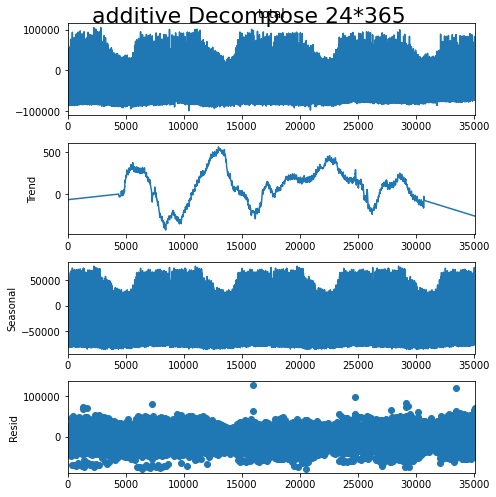

[0. 0. 0. ... 0. 0. 0.]


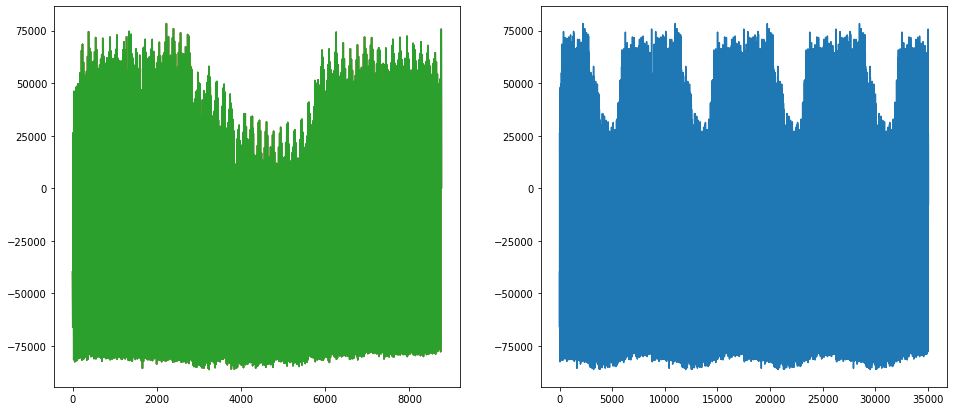

[-35.22662893 -35.58894026 -35.82128826 ... 156.98289484 158.23357638
 158.85777451]


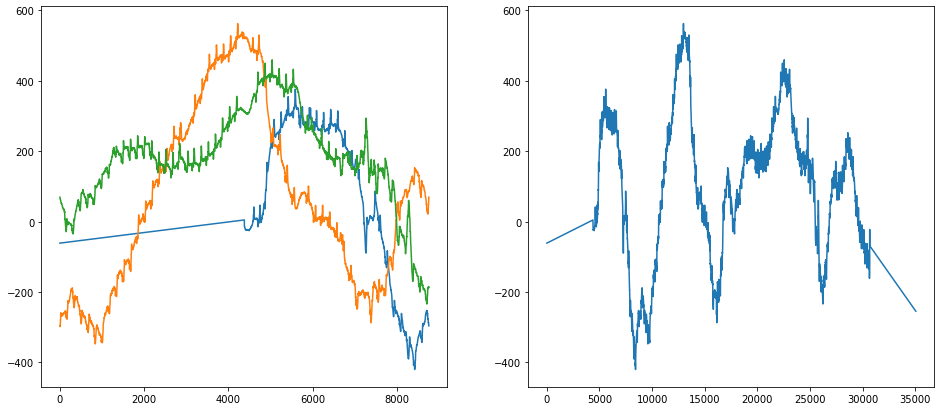

[-3535.98217275  1157.12821235  -695.35466496 ... -4467.86809271
 -1211.40428604   906.31241194]


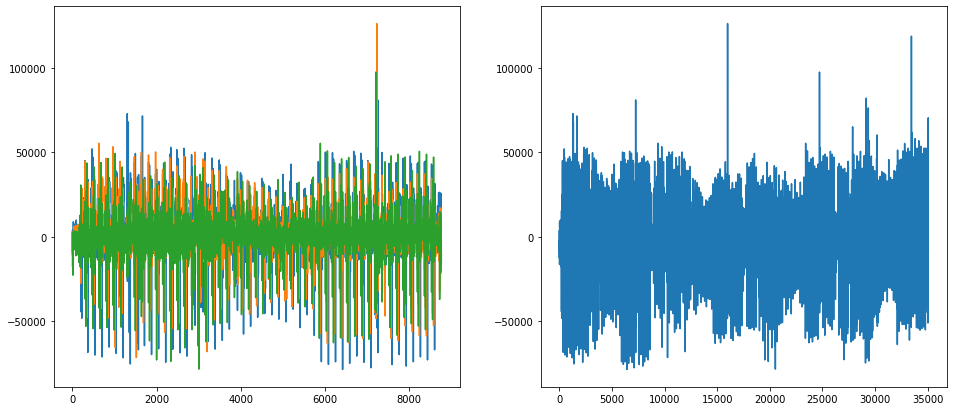

In [14]:
year_values, year_decomposed = apply("24*365", train["total"])
year_values += year_decomposed.trend

In [15]:
# global_trend += year_decomposed.trend

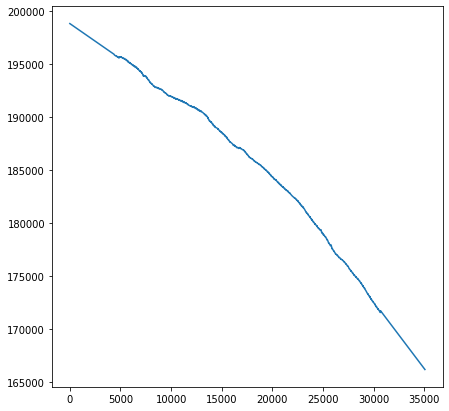

In [16]:
plt.plot(global_trend)
plt.show()

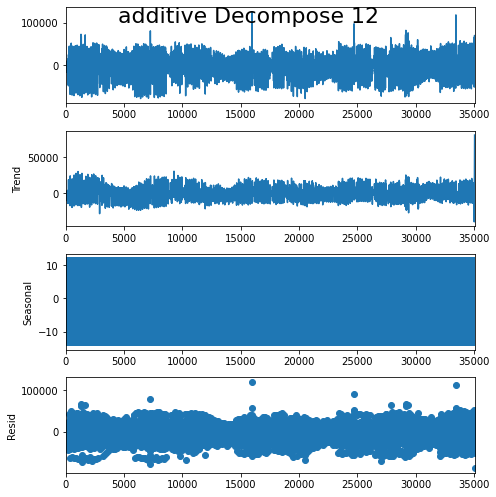

[-3.51718654e-13  3.87245791e-13  4.90274488e-13 -3.04645198e-13
  2.17603713e-13  2.08721929e-13 -6.50590692e-14  2.18491891e-13
 -4.97379915e-14  1.06581410e-13 -5.66657832e-13 -3.03757020e-13]


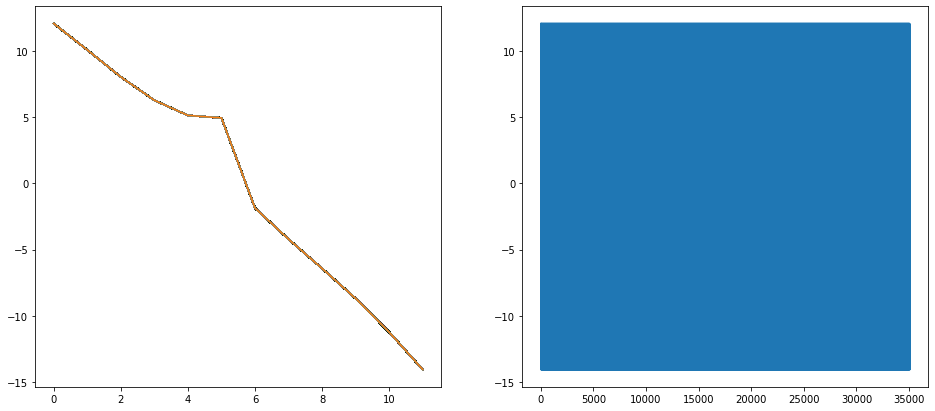

[1485.48377053 2082.3545141  2679.28408152 3275.9264829  3871.94156476
 4466.99453252 4950.15013824 4930.22575576 5431.71057715 6425.32013327
 7682.04083328 8985.31487252]


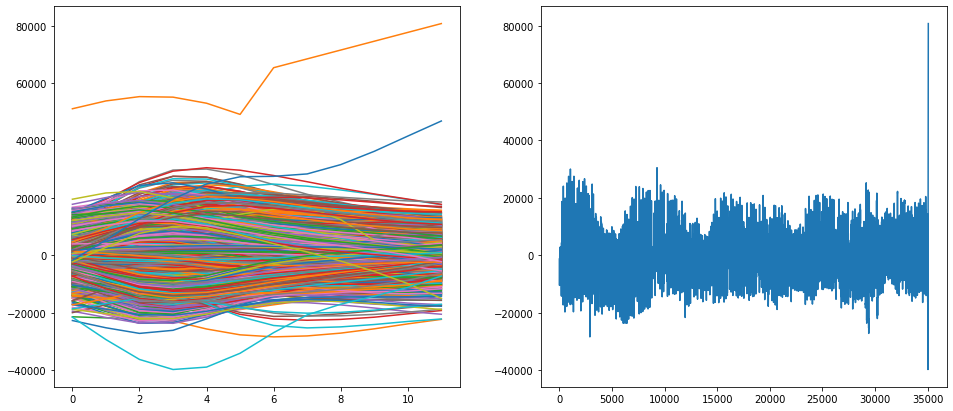

[ 7285.523944    2376.85195831 -5319.36784941 -6867.2267556
 -6510.43172705 -3519.43467636  2473.08939296  7340.27412274
  6723.43183774  6277.55686817   864.07540276 -6538.64316803]


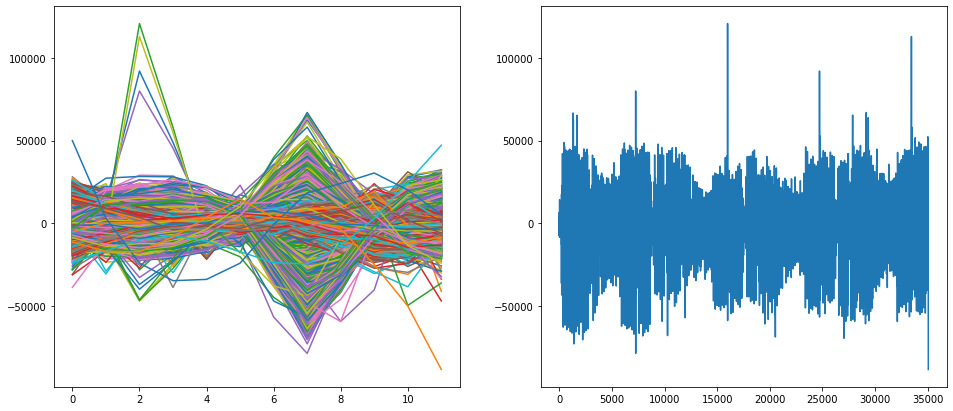

In [17]:
halfday_values, halfday_decomposed = apply("12", year_values)#, year_decomposed)#, "trend")

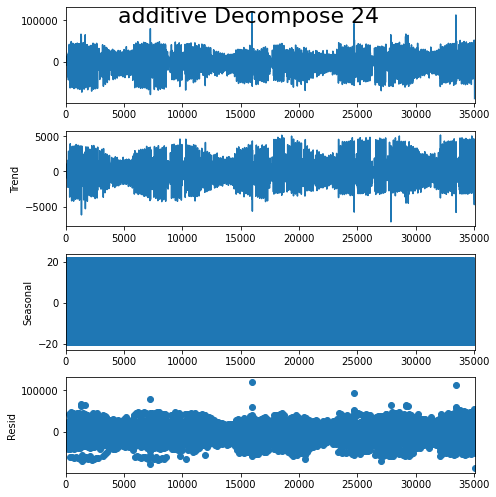

[ 1.24344979e-14 -1.08357767e-13  1.37667655e-14  3.68594044e-14
 -1.56541446e-14  3.05311332e-15  1.74082970e-13  1.19015908e-13
 -4.13891144e-13  4.10338430e-13 -5.96855898e-13 -3.76587650e-13
  2.38031816e-13  2.57571742e-14  5.41788836e-14 -6.68354261e-14
  7.54951657e-15 -4.75175455e-14 -2.01616501e-13  1.59872116e-13
  2.82440737e-13  1.03028697e-13 -3.12638804e-13 -5.68434189e-13]


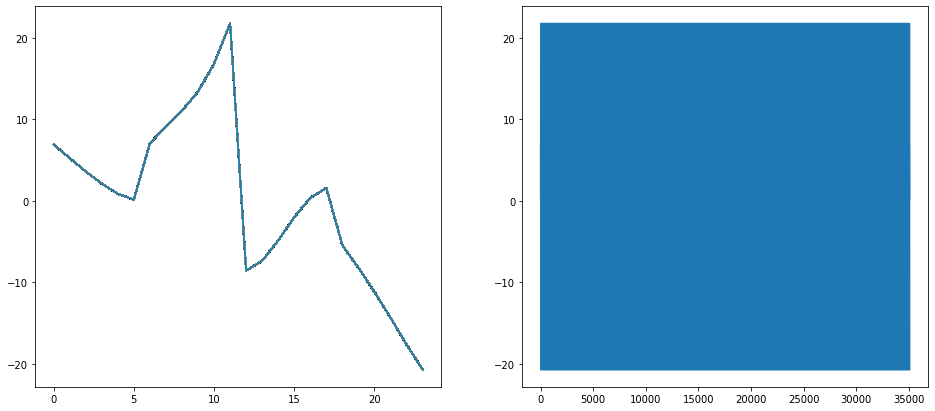

[ 975.89600678  933.70316851  891.43335017  849.33479425  807.62144765
  766.32782819  725.06988144  683.60150806  642.07989634  600.18682325
  557.47506776  513.58061962  174.64193389 -156.69678414 -133.49131524
  142.09983754  455.16922304  748.67387406  850.59665575  687.26918169
  411.28225495   69.35424249 -269.97391617 -384.58331875]


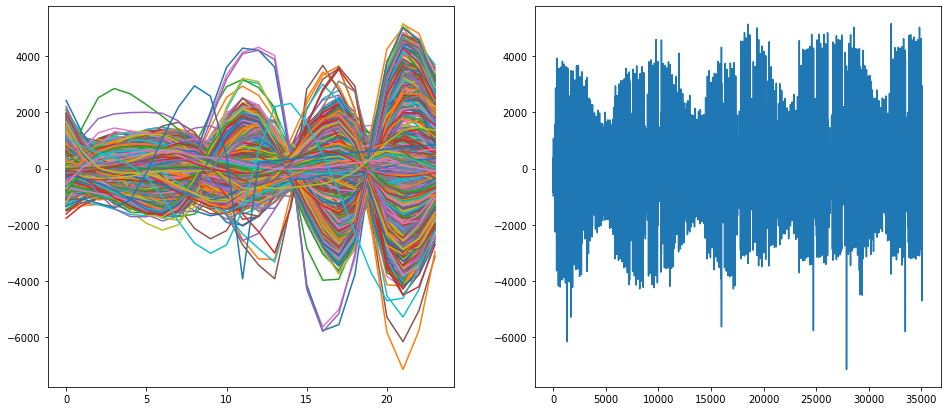

[  6316.98607707   1448.36690599  -6207.775713    -7715.41974711
  -7318.1574815   -4286.15181984   1754.97981195   6665.95596825
   6092.76007257   5690.93531773    322.59848255  -7033.47978765
  -4381.18885346  -3093.51766197  -3538.3933071     -60.81040565
   2156.57332876   5799.42921559   4470.18818774   3993.35002291
   7922.7507518    5272.54757412  -2285.14574031 -13859.84122816]


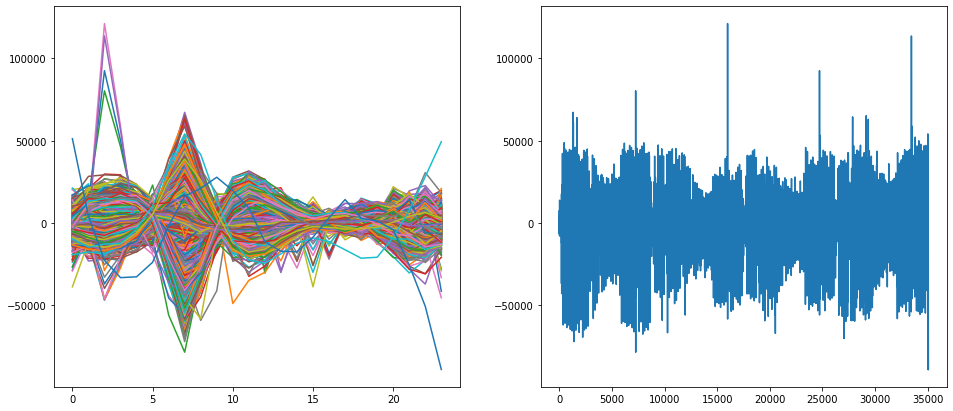

In [18]:
day_values, day_decomposed = apply("24", halfday_values)#, halfday_decomposed, "seasonal")

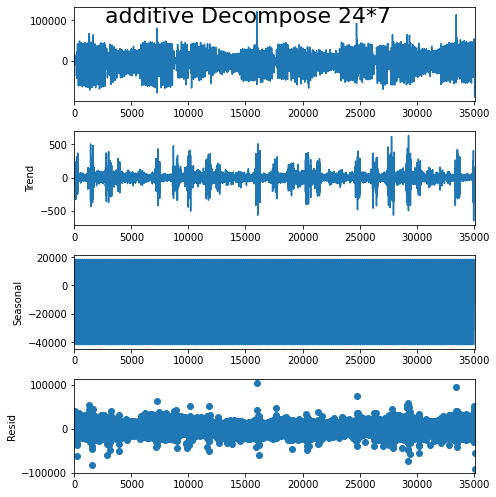

[-1.63709046e-11 -7.27595761e-12 -5.45696821e-12 -2.63753464e-11
  2.18278728e-11 -1.56319402e-13 -7.27595761e-11  6.91215973e-11
  5.09317033e-11 -3.18323146e-12 -3.09228199e-11  5.82076609e-11
  1.81898940e-12  3.54702934e-11 -9.09494702e-13  4.09272616e-12
  8.18545232e-12  1.00044417e-11 -2.16004992e-12  2.09183781e-11
  1.81898940e-11  3.63797881e-11  7.27595761e-12 -6.36646291e-12
 -2.09183781e-11  5.45696821e-12  1.81898940e-11  4.36557457e-11
  3.45607987e-11  1.04591891e-11 -6.18456397e-11 -1.89174898e-10
 -1.09139364e-10 -7.27595761e-12  4.91127139e-11  4.00177669e-11
  3.27418093e-11 -2.72848411e-11 -8.18545232e-12 -5.68434189e-14
 -1.08002496e-12  6.36646291e-12 -7.27595761e-12 -1.04591891e-11
  9.09494702e-13  1.81898940e-12  1.13686838e-12  9.54969437e-12
  1.72803993e-11 -1.00044417e-11  5.45696821e-12 -2.45563569e-11
 -1.72803993e-11  4.54747351e-13  3.63797881e-11 -7.63975549e-11
  1.63709046e-11 -1.36424205e-12 -1.81898940e-12  3.63797881e-12
 -1.00044417e-11  7.73070

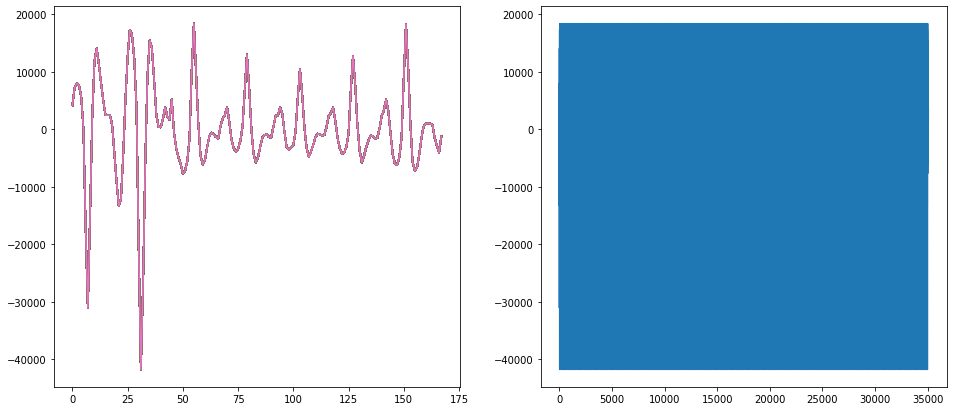

[  -2.7677251    -3.07805623   -3.22303057   -3.24085784   -3.229463
   -3.2834779    -3.36329274   -3.33503684   -3.28774377   -3.29277909
   -3.1642168    -2.96922839   -2.9081329    -2.96952385   -3.02759221
   -3.04858408   -3.03818194   -2.91166463   -2.56422126   -2.00154417
   -1.5809828    -1.53851991   -1.78583606   -2.20511858   -2.51102946
   -2.63330986   -2.64123457   -2.5823259    -2.55824963   -2.5776107
   -2.59423292   -2.59706837   -2.62901124   -2.6809154    -2.68797683
   -2.60044788   -2.53664863   -2.50645072   -2.40254815   -2.26374493
   -2.07282625   -1.85547794   -1.67566252   -1.59600882   -1.69530442
   -1.92440177   -2.1512733    -2.32795127   -2.34402184   -2.22542629
   -2.10377108   -1.99568959   -1.916135     -1.88746328   -1.84277438
   -1.8084672    -1.85896208   -1.82370386   -1.86853223   -1.99659266
   -2.07404391   -2.12919221   -2.04758978   -1.85809643   -1.62871592
   -1.41518932   -1.25778488   -1.19889107   -1.33327223   -1.53862504
   -1.690

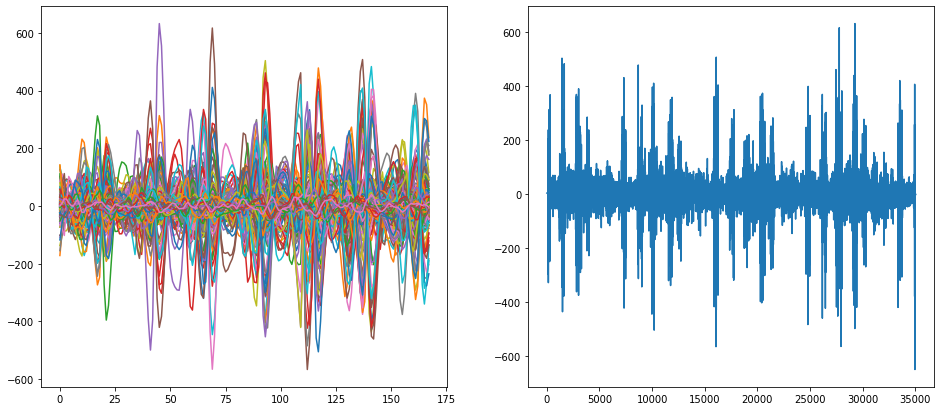

[ 1.05509562e+04  8.65595598e+03  1.74701382e+03 -1.05590498e+02
 -1.70454483e+03 -4.27103256e+03 -1.55326115e+04 -2.42385029e+04
 -8.70499550e+03  7.91748604e+03  1.22091014e+04  6.99402706e+03
  6.84550233e+03  4.85185292e+03  1.35534791e+03  2.39156825e+03
  4.58617893e+03  8.23591454e+03  5.19896546e+03 -2.98477644e+02
 -1.17923143e+03 -8.12770969e+03 -1.42795712e+04 -1.82550794e+04
  1.39556219e+03  1.03824286e+04  1.77714940e+04  1.66717769e+04
  1.30806860e+04  6.60670061e+03 -1.94589575e+04 -4.05036306e+04
 -2.63731468e+04 -7.82790006e+03  4.55783415e+03  1.09880827e+04
  1.52564538e+04  9.76143617e+03  4.04662973e+03  4.55444654e+03
  2.91320699e+03  2.43735260e+03  1.65686848e+03 -2.50475500e+02
  1.97766498e+02  6.14584185e+03 -5.62830473e+03  1.41943794e+03
 -6.70784585e+03 -5.02420479e+03 -4.01850580e+03 -5.29795857e+03
 -2.85545033e+03  2.36103356e+02  9.92279850e+03  1.85155144e+04
  8.30217072e+03 -1.51901882e+03 -1.04361836e+04 -9.76498515e+03
 -4.30620953e+03 -3.23111

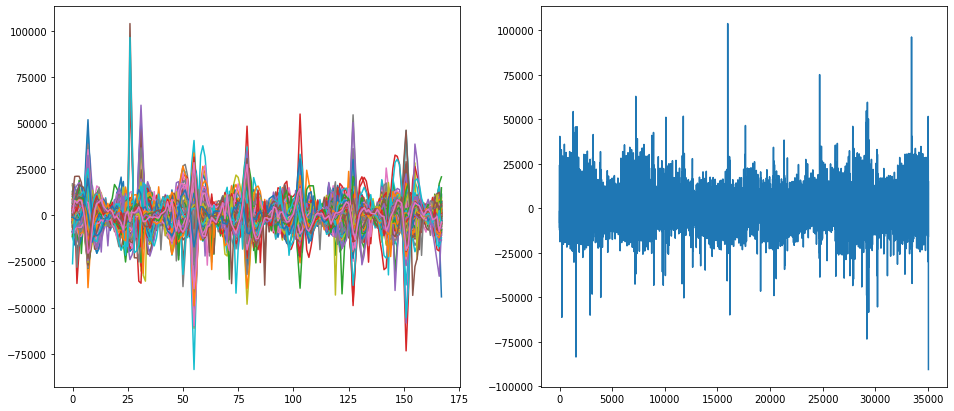

In [19]:
week_values, week_decomposed = apply("24*7", day_values)#, day_decomposed, "seasonal")

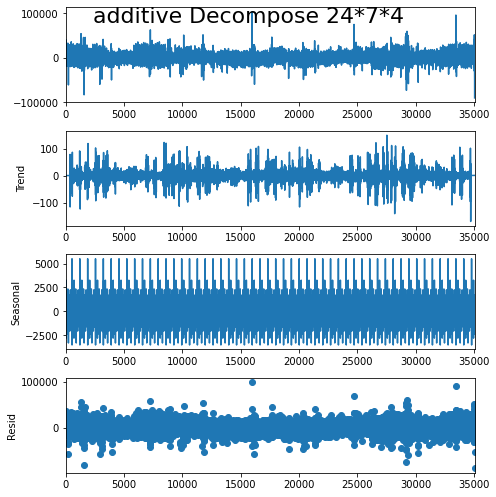

[-6.82121026e-13 -5.68434189e-13  1.42108547e-13 -4.26325641e-14
  1.42108547e-13  3.41060513e-13 -9.09494702e-13 -1.81898940e-12
  5.68434189e-13 -2.27373675e-13 -2.27373675e-13 -1.02318154e-12
  2.27373675e-13 -5.68434189e-13 -6.82121026e-13 -3.41060513e-13
 -5.68434189e-14 -5.68434189e-14  1.42108547e-14 -3.41060513e-13
  0.00000000e+00  6.82121026e-13 -6.82121026e-13 -3.41060513e-13
 -5.68434189e-13  1.81898940e-12 -2.72848411e-12 -1.13686838e-12
  3.41060513e-13  1.13686838e-13  6.82121026e-13 -1.36424205e-12
  4.54747351e-13  1.98951966e-13  2.27373675e-13 -6.82121026e-13
 -2.27373675e-13  2.27373675e-13 -1.70530257e-13 -1.70530257e-13
  1.27897692e-13  0.00000000e+00 -2.27373675e-13  2.27373675e-13
  7.95807864e-13 -4.54747351e-13  3.41060513e-13 -3.41060513e-13
  4.54747351e-13  6.82121026e-13  9.09494702e-13  3.41060513e-13
  1.13686838e-13 -1.42108547e-14 -6.82121026e-13 -1.81898940e-12
  6.82121026e-13  1.70530257e-13 -3.41060513e-13  4.54747351e-13
 -1.13686838e-13  5.68434

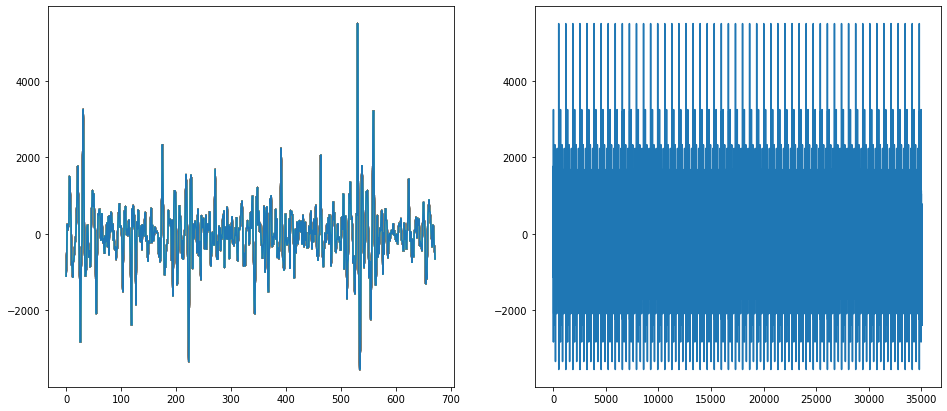

[-8.36213387e-01 -6.11660734e-01 -2.95617756e-01 -7.58919167e-02
  1.04531474e-01  2.26038721e-01  6.86653564e-02 -4.57897076e-01
 -8.40082044e-01 -8.17848445e-01 -6.64487419e-01 -4.44433130e-01
 -2.11105355e-01 -9.67446907e-02 -7.91451813e-02 -5.01368701e-02
 -5.53246871e-02 -1.02402885e-01 -1.40143865e-01 -1.51117477e-01
 -1.80517133e-01 -1.49970247e-01 -1.14363995e-01 -2.91575918e-01
 -6.12355814e-01 -7.93700318e-01 -7.85771584e-01 -7.78260978e-01
 -7.23263950e-01 -5.49852442e-01 -3.20003146e-01  1.08897221e-01
  6.09874288e-01  8.01570541e-01  6.55047343e-01  3.30337589e-01
  1.56343263e-02 -2.29744344e-01 -4.20936143e-01 -5.70502694e-01
 -6.76648169e-01 -7.31834860e-01 -7.16781361e-01 -5.78252657e-01
 -4.45918780e-01 -2.96540248e-01 -1.10168050e-01  2.24462298e-02
 -1.71935350e-02 -2.16649670e-01 -4.67618008e-01 -8.44565449e-01
 -1.21067510e+00 -1.40212917e+00 -1.13530261e+00 -2.03610532e-01
  8.63171955e-01  1.37834924e+00  1.31138486e+00  8.84455549e-01
  3.89688157e-01 -4.82077

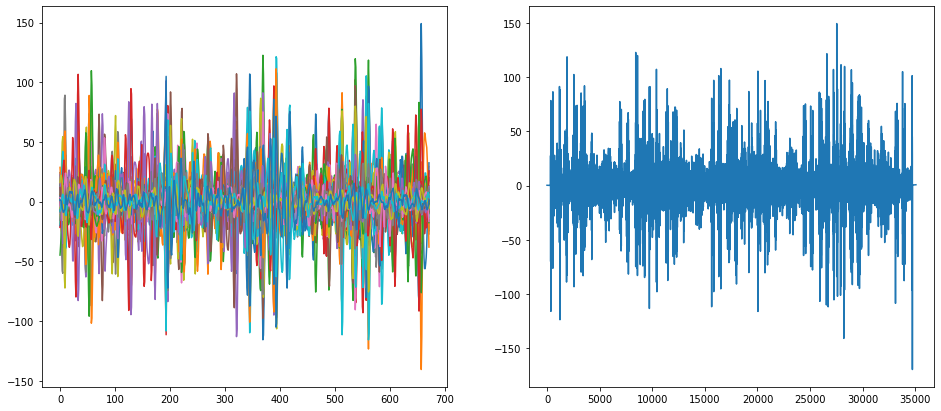

[ 9.43846541e+03  7.93939734e+03  1.86308312e+03 -1.64079935e+02
 -1.66385135e+03 -4.12855478e+03 -1.37853616e+04 -2.22525555e+04
 -7.61196130e+03  8.32316734e+03  1.12690962e+04  5.89060733e+03
  5.53778136e+03  3.99276938e+03  5.46870400e+02  1.84799187e+03
  4.25889952e+03  7.94444221e+03  5.25415180e+03  2.43865342e+02
 -1.01562796e+02 -6.38178236e+03 -1.30502704e+04 -1.73914990e+04
  9.74623125e+02  8.98641954e+03  1.49359261e+04  1.53623331e+04
  1.25919879e+04  6.36371620e+03 -1.75834080e+04 -3.71877644e+04
 -2.41350448e+04 -7.65092701e+03  3.79629945e+03  9.84596359e+03
  1.42446285e+04  8.81511564e+03  4.19397893e+03  4.84475030e+03
  2.76590490e+03  1.82530719e+03  1.05048938e+03 -8.13793824e+02
 -7.97115449e+02  5.37491890e+03 -4.98029330e+03  2.32644391e+03
 -5.33521592e+03 -4.05449561e+03 -2.76602377e+03 -4.32075710e+03
 -2.58745951e+03  1.67553707e+02  7.95242387e+03  1.56735358e+04
  6.82186317e+03 -1.82933907e+03 -9.64926094e+03 -8.89026729e+03
 -3.35219225e+03 -2.38030

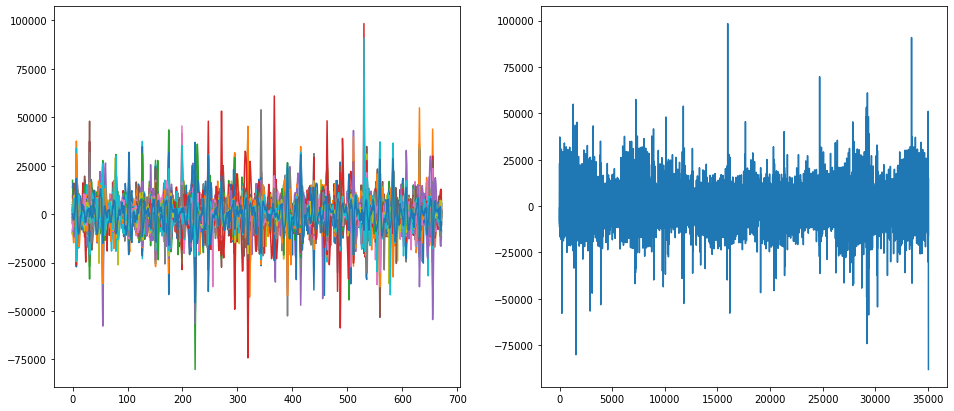

In [20]:
month_values, month_decomposed = apply("24*7*4", week_values)#, week_decomposed, "seasonal")

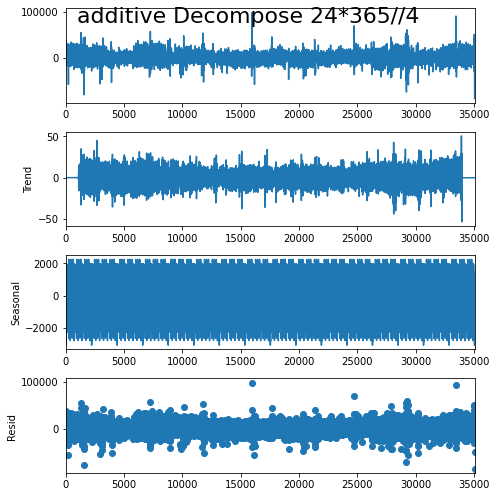

[ 2.84217094e-14  4.54747351e-13  0.00000000e+00 ... -1.13686838e-13
  0.00000000e+00  4.54747351e-13]


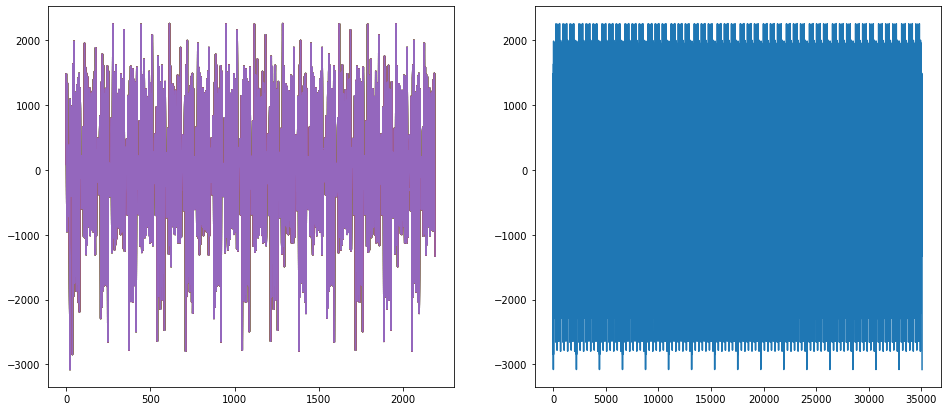

[-3.49691360e-01 -1.78532473e-04  4.08838519e-01 ... -2.61668383e+00
  1.75656763e-01  6.15669541e-01]


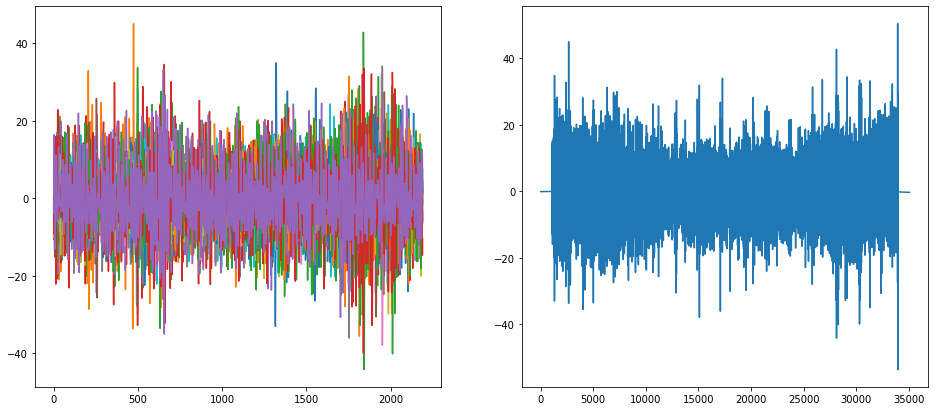

[ 6083.95401605  9110.00654174  4219.10156708 ... -1051.44260252
 -1046.2737546  -1688.34561291]


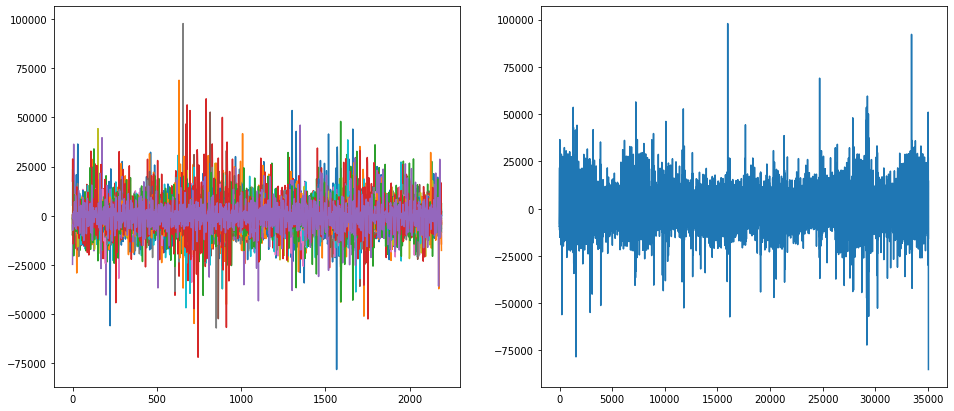

In [21]:
season_values, season_decomposed = apply("24*365//4", month_values)#, month_decomposed, "seasonal")

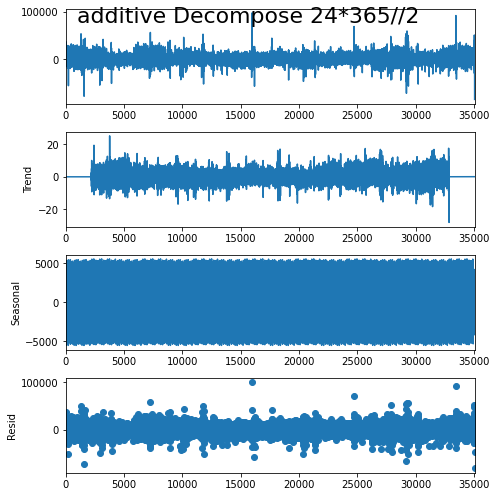

[ 2.27373675e-13  4.54747351e-13 -4.54747351e-13 ...  0.00000000e+00
  2.84217094e-14 -1.13686838e-13]


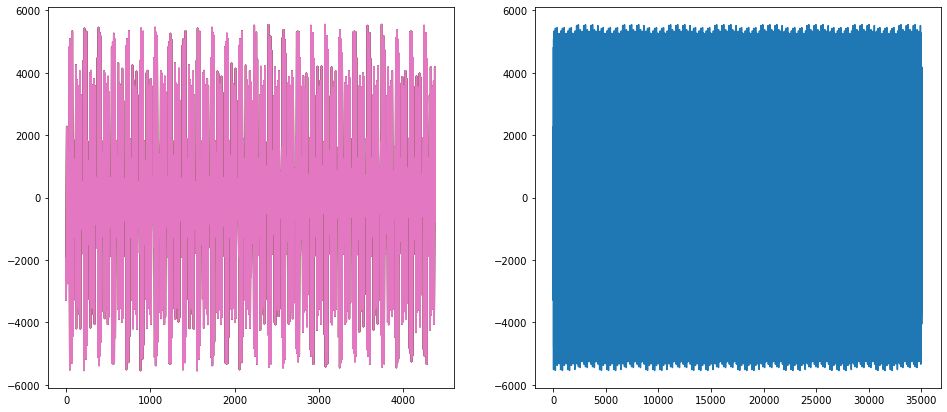

[-0.03703721  0.90052621  1.64978071 ... -0.25169663 -0.17515482
 -0.61779495]


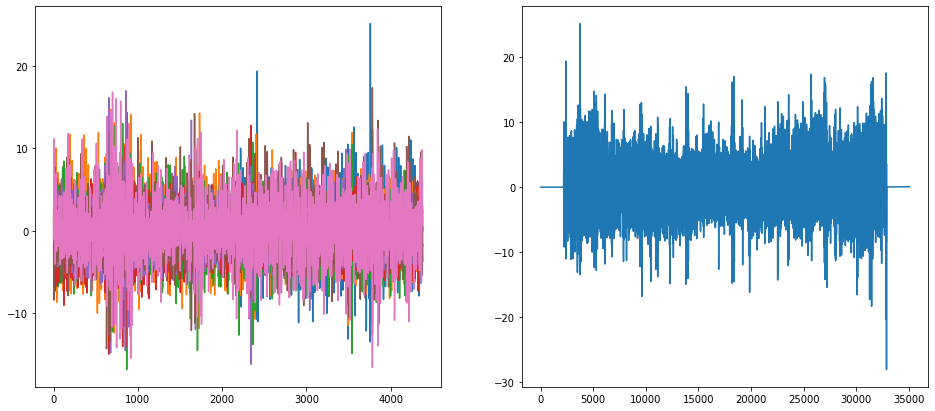

[  428.39432598  5743.80732409  3484.73677101 ...  3967.75133047
  1726.91284656 -5069.79666887]


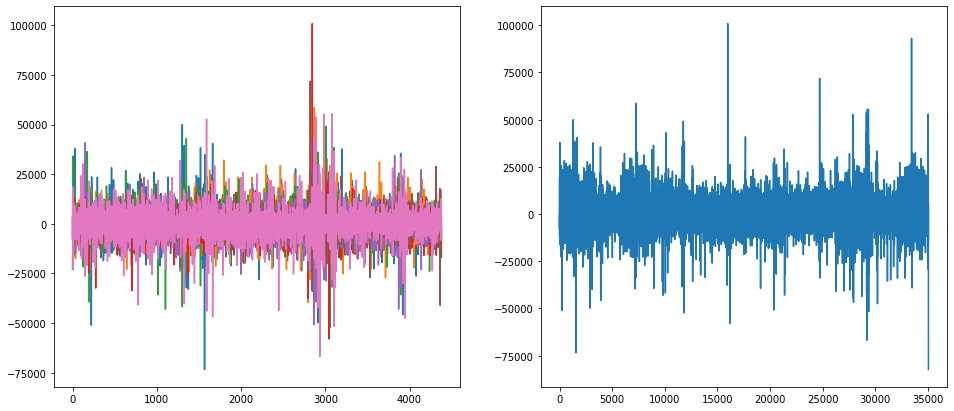

In [22]:
halfyear_values, halfyear_decomposed = apply("24*365//2", season_values)#, season_decomposed, "seasonal")

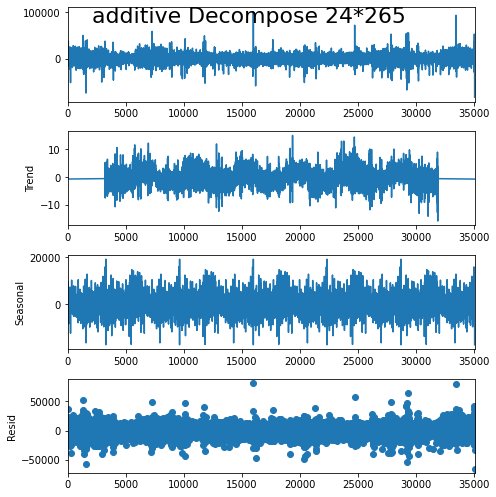

[0. 0. 0. ... 0. 0. 0.]


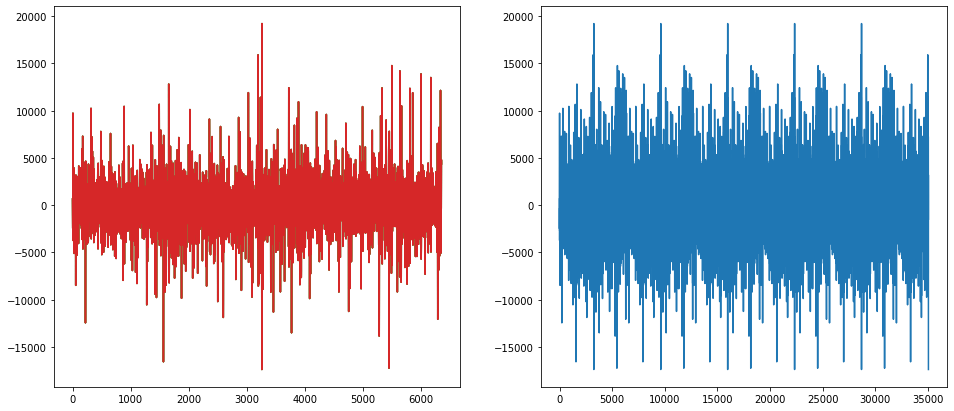

[ 1.14353903  1.27952285  1.38726549 ... -1.77527862 -1.96676997
 -2.22923897]


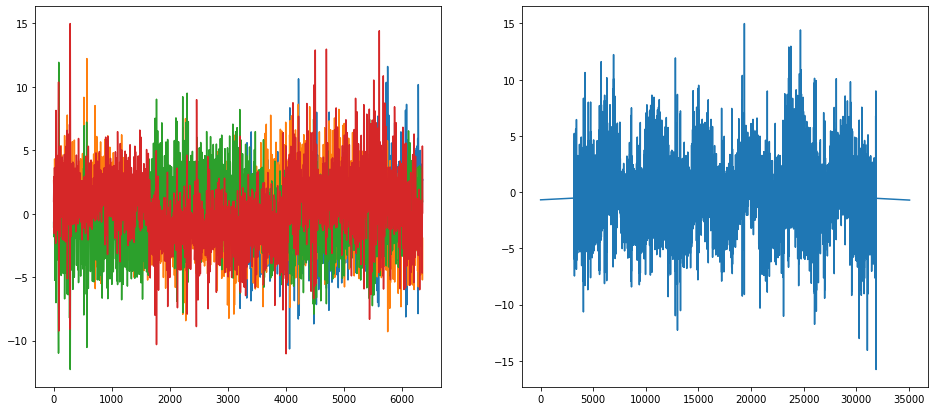

[ 5645.82782872  3654.930776   -3501.70866068 ... -1413.42875833
 -4899.98072557  2169.27714025]


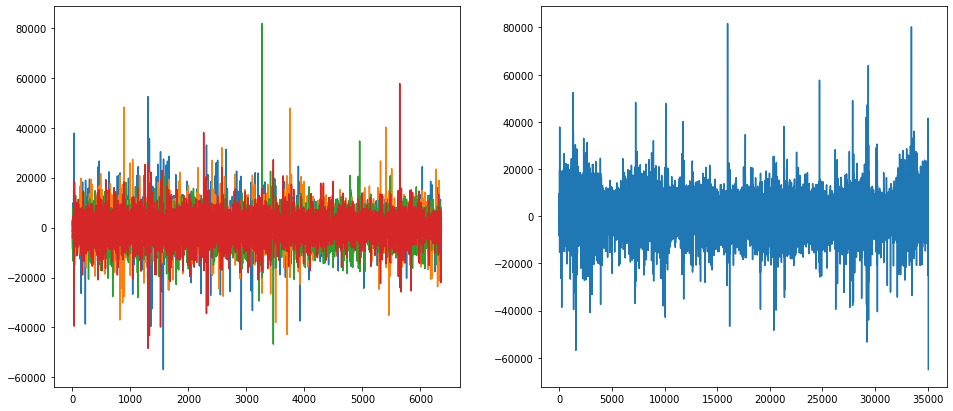

In [23]:
_values, _decomposed = apply("24*265", halfyear_values)#, halfyear_decomposed, "trend")

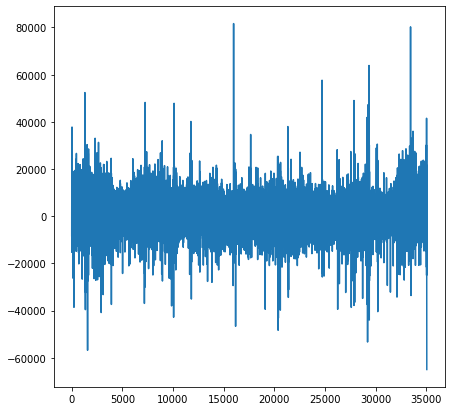

In [24]:
plt.plot(_values)
plt.show()

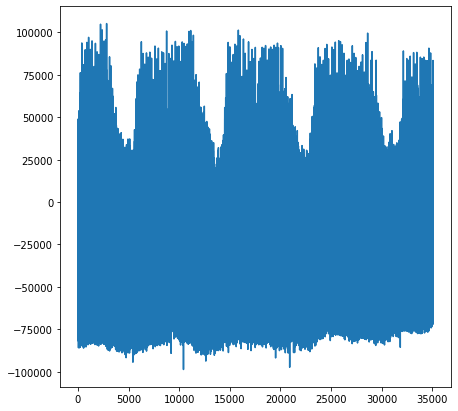

In [25]:
# year_detrended = train["total"] - year_decomposed.trend
# plt.plot(year_detrended)
# plt.show()

In [26]:
# period = "12"
# halfday_decomposed = my_decompose(year_detrended, period)

# plt.plot(halfday_decomposed.seasonal[:100])
# plt.show()

# halfday_deseasonalized = year_detrended - halfday_decomposed.seasonal
# plt.plot(halfday_deseasonalized)
# plt.show()

In [27]:
# period = "36"
# day_decomposed = my_decompose(halfday_deseasonalized, period)

# plt.plot(day_decomposed.seasonal[:100])
# plt.show()

# day_deseasonalized = halfday_deseasonalized - day_decomposed.seasonal
# plt.plot(day_deseasonalized)
# plt.show()

In [28]:
# period = "7"
# week_decomposed = my_decompose(day_deseasonalized, period)

# plt.plot(week_decomposed.seasonal[:100])
# plt.show()

# week_deseasonalized = day_deseasonalized - week_decomposed.seasonal
# plt.plot(day_deseasonalized)
# plt.show()

In [29]:
train["season"] = [date.month % 4 for date in train["datetime"]]
train["month"] = [date.month for date in train["datetime"]]
train["is_weekend"] = [date.weekday() >= 5 for date in train["datetime"]]
train["weekday"] = [date.weekday() for date in train["datetime"]]
train["hour"] = [date.hour for date in train["datetime"]]

In [30]:
train

,datetime,total,season,month,is_weekend,weekday,hour
0,2005-01-01 00:00:00,-48370.820159,1,1,True,5,0
1,2005-01-01 01:00:00,-44692.155426,1,1,True,5,1
2,2005-01-01 02:00:00,-41013.490693,1,1,True,5,2
3,2005-01-01 03:00:00,-49519.825961,1,1,True,5,3
4,2005-01-01 04:00:00,-60548.161228,1,1,True,5,4
...,...,...,...,...,...,...,...
35059,2008-12-31 19:00:00,83225.760820,0,12,False,2,19
35060,2008-12-31 20:00:00,80362.027598,0,12,False,2,20
35061,2008-12-31 21:00:00,60321.294375,0,12,False,2,21
35062,2008-12-31 22:00:00,33760.561153,0,12,False,2,22


In [31]:
train.corr()

,total,season,month,is_weekend,weekday,hour
total,1.000000,-7.532143e-03,-5.140984e-03,-1.723379e-02,-2.036569e-02,6.897887e-01
season,-0.007532,1.000000e+00,-6.780733e-02,-1.926463e-03,1.676365e-03,7.342119e-17
month,-0.005141,-6.780733e-02,1.000000e+00,4.134813e-03,5.804036e-03,-1.359344e-16
is_weekend,-0.017234,-1.926463e-03,4.134813e-03,1.000000e+00,7.910701e-01,-6.356017e-18
weekday,-0.020366,1.676365e-03,5.804036e-03,7.910701e-01,1.000000e+00,-6.136595e-18
hour,0.689789,7.342119e-17,-1.359344e-16,-6.356017e-18,-6.136595e-18,1.000000e+00


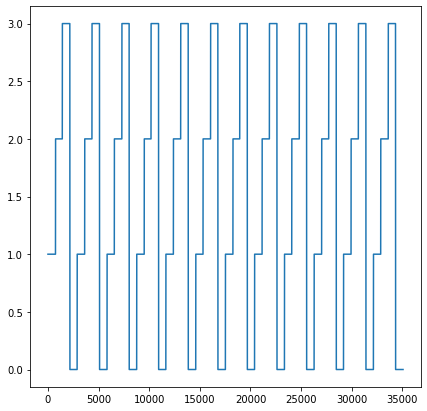

In [32]:
plt.plot(train["season"])

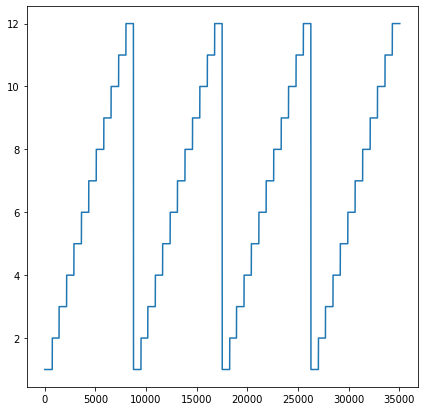

In [33]:
plt.plot(train["month"])

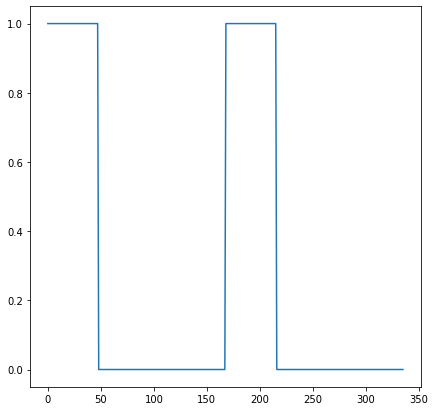

In [34]:
plt.plot(train["is_weekend"][:24*7*2])

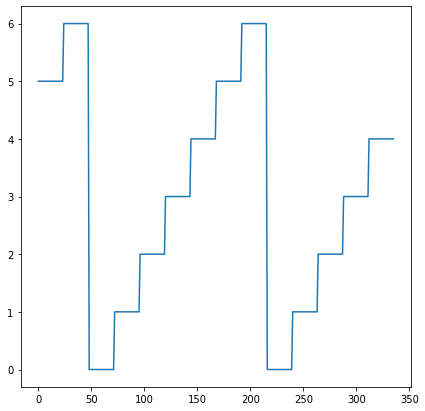

In [35]:
plt.plot(train["weekday"][:24*7*2])

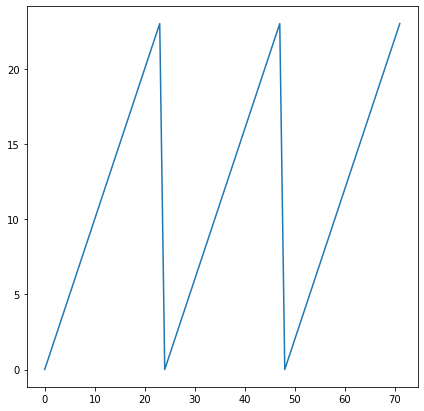

In [36]:
plt.plot(train["hour"][:24*3])

In [37]:
series = train.total.values

In [38]:
ar = AutoReg(series, lags=168, seasonal=True).fit()

ValueError: freq cannot be inferred from endog and model includes seasonal terms.  The number of periods must be explicitly set when the endog's index does not contain a frequency.

In [ ]:
answer = ar.predict(start=35064, end=35064+4344-1, dynamic=False)

: 

In [ ]:
with open("answer.txt", "w") as f:
    for v in answer:
        f.write(str(v))
        f.write('\n')

: 